In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

datafile = '../../../challenges_data/2013_movies.csv'

df = pd.read_csv(datafile)

df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
print df.head()
print df.dtypes

                             Title     Budget  DomesticTotalGross  \
0  The Hunger Games: Catching Fire  130000000           424668047   
1                       Iron Man 3  200000000           409013994   
2                           Frozen  150000000           400738009   
3                  Despicable Me 2   76000000           368061265   
4                     Man of Steel  225000000           291045518   

                    Director Rating  Runtime ReleaseDate  
0           Francis Lawrence  PG-13      146  2013-11-22  
1                Shane Black  PG-13      129  2013-05-03  
2     Chris BuckJennifer Lee     PG      108  2013-11-22  
3  Pierre CoffinChris Renaud     PG       98  2013-07-03  
4                Zack Snyder  PG-13      143  2013-06-14  
Title                         object
Budget                       float64
DomesticTotalGross             int64
Director                      object
Rating                        object
Runtime                        int64
ReleaseDa

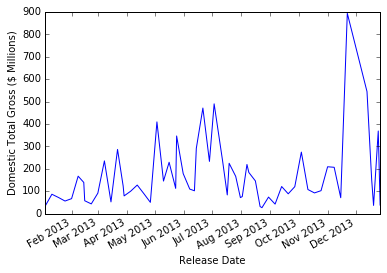

In [40]:
# Challenge 1

dtg_series = df.groupby('ReleaseDate').sum()['DomesticTotalGross'].sort_index()
dtg_series /= 1e6

dtg_series.plot.line()
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross ($ Millions)')
plt.show()


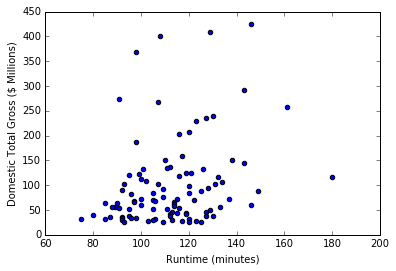

In [42]:
# Challenge 2

df.head()
plt.scatter(df['Runtime'], df['DomesticTotalGross']/1e6)

plt.xlabel('Runtime (minutes)')
plt.ylabel('Domestic Total Gross ($ Millions)')
plt.show()

In [46]:
# Challenge 3
print pd.pivot_table(df, values=['Runtime','DomesticTotalGross'], index=['Rating'])

        DomesticTotalGross     Runtime
Rating                                
G             2.684928e+08  107.000000
PG            1.311357e+08   99.933333
PG-13         1.114498e+08  117.510638
R             6.989243e+07  110.729730


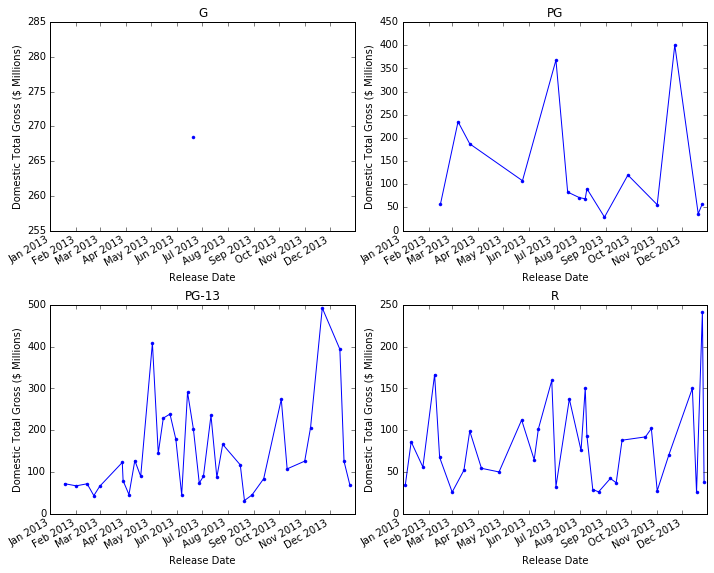

In [86]:
# Challenge 4
# Make one figure with (N=the number of MPAA ratings there are) subplots
# and in each plot the release date vs the domestic total gross.

def plotReleaseVGross(df):
    dtg_series = df.groupby('ReleaseDate').sum()['DomesticTotalGross'].sort_index()/1e6
    dtg_series.plot(marker='.',xlim=pd.to_datetime(['1/1/2013','12/31/2013']))
    plt.xlabel('Release Date')
    plt.ylabel('Domestic Total Gross ($ Millions)')

fig = plt.figure()
fig.set_size_inches(10, 8)
#fig = plt.subplots(nrows=2, ncols=2)
plt.subplot(221)
plotReleaseVGross(df[df['Rating']=='G'])
plt.title('G')

plt.subplot(222)
plotReleaseVGross(df[df['Rating']=='PG'])
plt.title('PG')

plt.subplot(223)
plotReleaseVGross(df[df['Rating']=='PG-13'])
plt.title('PG-13')

plt.subplot(224)
plotReleaseVGross(df[df['Rating']=='R'])
plt.title('R')
plt.tight_layout(pad=1.0, w_pad=0.5, h_pad=1.0)
plt.show()


In [100]:
# Challenge 5
print 'Top 5 directors by average domestic gross per movie'
df.groupby('Director').mean()['DomesticTotalGross'].sort_values(ascending=False)[:5]/1e6

Director
Francis Lawrence             424.668047
Shane Black                  409.013994
Chris BuckJennifer Lee       400.738009
Pierre CoffinChris Renaud    368.061265
Zack Snyder                  291.045518
Name: DomesticTotalGross, dtype: float64

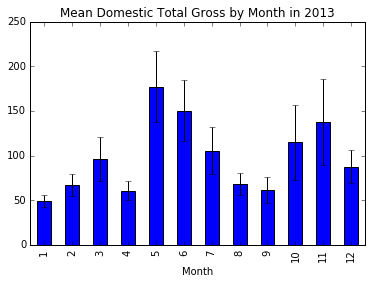

In [138]:
# Challenge 6
# Bin your dataset into months and make a bar graph of the mean domestic total gross by month.
# Error bars will represent the standard error of the mean.

# Title of graph should include: Mean Domestic Total Gross by Month in 2013

# Topic for consideration: what is the correct formula for the standard error of the mean?
# Examine the error bars and see if they are "reasonable."

# Solution 1: resample
# df['ReleaseDate'][:5]
# print df.set_index('ReleaseDate').resample('M')['DomesticTotalGross']/1e6

# Solution 2: groupby
df_month = df.copy()
df_month['Month'] = df['ReleaseDate'].map(lambda x: x.month)
df_month['DomesticTotalGross'] /= 1e6
df_month = df_month.groupby('Month')['DomesticTotalGross']
mn = df_month.mean()
sd = df_month.std()/np.sqrt(df_month.count()) # Divide by sqrt(n) for std of mean estimate

fig = mn.plot.bar(yerr=sd)
_ = plt.title('Mean Domestic Total Gross by Month in 2013')

